# Stochastik 
### Julian Nohl, Philippe Westenfelder
## A 1.11

#### 1.11.1
Geben Sie an, welche der Eigenschaften qualitativ, quantitativ, diskret, stetig auf das ebenfalls untersuchte Merkmal „Anzahl der Räder des Fahrzeugs“ zutrifft bzw. zutreffen. Begründen Sie Ihre Wahl (kurz).
#### **Antwort: Quantitativ, diskret, da Räder elemente der Natürlichen Zahlen sind**

In [2]:
import numpy as np

verbrauch_hersteller = [4.2, 3.9, 4.3, 4.1, 4.1]
verbrauch_test = [4.8, 4.1, 4.8, 4.5, 4.4]

#### 1.11.2

In [3]:
print("a) Mean:",np.mean(verbrauch_hersteller))
print("b) 0,25 Quartil", np.quantile(verbrauch_hersteller, 0.25))
print("   0,5 Quartil", np.quantile(verbrauch_hersteller, 0.5))
print("   0,75 Quartil", np.quantile(verbrauch_hersteller, 0.75))
print("c) 10%-Quantil", np.quantile(verbrauch_hersteller, 0.1))
print("d) Spannweite", np.max(verbrauch_hersteller) - np.min(verbrauch_hersteller))
print("e) Standardabweichung", np.std(verbrauch_hersteller, ddof=1))

a) Mean: 4.12
b) 0,25 Quartil 4.1
   0,5 Quartil 4.1
   0,75 Quartil 4.2
c) 10%-Quantil 3.98
d) Spannweite 0.3999999999999999
e) Standardabweichung 0.1483239697419133


#### 1.11.3
A) Was bedeutet der Wert der empirischen Standardabweichung (Ihr Ergebnis aus Aufgabe 1.11.2?)
für den Benzinverbrauch eines Autos (laut Hersteller)?  

**Antwort: Die Standardabweichung gibt an wie stark die Werte um den Mittelwert streuen.**

B) Alice interessiert sich dafür, inwieweit die Verbrauchsangaben der Hersteller und der im Test erzielte
Benzinverbrauch vergleichbar sind. Daher erstellt Sie folgende Grafik:  

**Antwort:**
- **Der Mittelwert der Herstellerangaben ist deutlicher kleiner als beim Testergebnis**
- **Die Standardabweichung der Herstellerangaben ist deutlich kleiner als beim Testergebnis**  

**Dieser Sachverhalt kann natürlich in der Realität nicht so vorkommen, da Autohersteller sich definitiv immer an ihre Angaben halten und niemals durch Test herausgekommen ist, dass sie bei diesen gelogen hätten vor allem bei VW (Ironie aus)**


**C) 0.961; Steigt die Herstellerangabe, steigt auch der Testwert. => keine negative Korrelation. Andere lassen sich ausschließen, da eine starke Korrelation vorliegt.**

In [4]:
print(np.corrcoef(verbrauch_hersteller, verbrauch_test)[1])

[0.96001567 1.        ]


Um abschätzen zu können, ob man aus der Herstellerangabe des Benzinverbrauchs das Testergebnis
ausrechnen kann, berechnet Alice die Regressionsgerade für die beiden Datensätze und erhält hierfür
das Bestimmtheitsmaß R
$R^{2} = 0.92$. Was bedeutet dieses? Ist die Anwendung der linearen Regression
hier sinnvoll und zulässig? Begründen Sie Ihre Meinung.
**Antwort: $R^{2}$ gibt an wie gut die Regression auf die Daten passt. Da $R^{2} = 0.92$ ist, passt die Regression sehr gut auf die Daten. Die Anwendung der linearen Regression ist hier sinnvoll und zulässig.**

#### 2.1

a) ${\Omega}$ = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
b) Nein, ${A \cap B = \emptyset}$
C) Ja, ${B \cap C = \{2\}$
D) $\overline{A}$ = gerade Zahlen
   $\overline{A} = {\Omega} \setminus B$ = {1, 3, 4, 5, ..., 10}
   $\overline{A} = {\Omega} \setminus C$ = {1, 4, 5, ..., 10}

#### 2.1.2
A) 1/10
B) 5/10 = 1/2
C) 8/10 = 4/5
D) 2/10 = 1/5 


#### 2.1.3
A) 1/10*1/10 = 1/100
B) 1 - 9/10*9/10 = 1 - 81/100 = 19/100
C) 3*(1/10) = 3/100 (1,3; 3,1; 2,2)
D) 3*(1/10) = 3/100 (10,10;10,9;9,10)


In [5]:
import pandas as pd
import time
import locale
import matplotlib.pyplot as plt


locale.setlocale(locale.LC_TIME, "en_US")

'en_US'

In [63]:
df = pd.read_csv("games.csv")
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [7]:
#Datum in Unix Timestamp umwandeln
pattern = "%b %d, %Y"
pattern2 = "%b %Y"
dateArray = [] 

for d in df["Release date"]:
    if "," in d:
        dateArray.append(int(time.mktime(time.strptime(d, pattern))))
    else:
        dateArray.append(int(time.mktime(time.strptime(d, pattern2))))
    

# todo: correlation peak ccu/price, price/release, price/dlc, price/achievements
np.corrcoef(df["Peak CCU"], df["Achievements"])[1][0]

0.006920927425832972

range 145727
max 145727
min 0
mean 119.15870935356126
median 0.0
std 1230.102923812986


/var/folders/4w/5w4v_g25369d8q51xj3j8py80000gn/T/ipykernel_53426/3957690164.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  map = plt.cm.get_cmap('jet')


0.06988567948525153

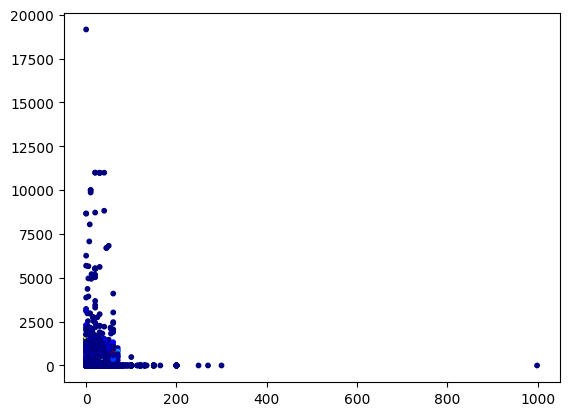

In [47]:
dataset = df["Average playtime forever"]



print('range', np.max(dataset) - np.min(dataset))
print('max', np.max(dataset))
print('min', np.min(dataset))
print('mean', np.mean(dataset))
print('median', np.median(dataset))
print('std', np.std(dataset, ddof=1))
# plt.hist(dataset)
# schöner boxplot: 
# plt.boxplot(dataset, vert=False, showfliers=True, showmeans=True, meanline=True, labels=['Average playtime forever'])

#scatterplot for correlation between price and average playtime:
# plt.scatter(df["Price"], df["Average playtime forever"]) 
# scatterplot with labels:
# plt.scatter(df["Price"], df["Average playtime forever"], s=10, c='r', marker="x")

# colormap for scatterplot: 
map = plt.cm.get_cmap('jet')
plt.scatter(df["Price"], df["Average playtime two weeks"], s=10, c=df["Peak CCU"], cmap=map)
np.corrcoef(df["Price"], df["Median playtime two weeks"])[1][0]


{'whiskers': [<matplotlib.lines.Line2D at 0x29a702aa0>,
 'caps': [<matplotlib.lines.Line2D at 0x29a702440>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a700c10>,
 'medians': [<matplotlib.lines.Line2D at 0x29a701b40>,
 'fliers': [<matplotlib.lines.Line2D at 0x15ac6a950>,
 'means': [<matplotlib.lines.Line2D at 0x15ac6bb80>,
  <matplotlib.lines.Line2D at 0x15ac696f0>]}

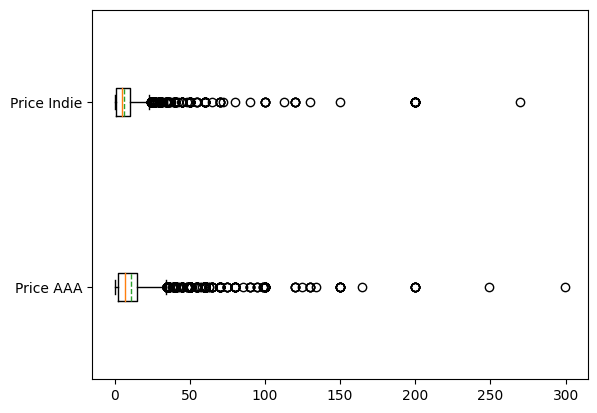

In [64]:
df = df[df['Price'] < 999]

prices_AAA = df[(df["Tags"].str.contains("Indie") == False) & (df["Genres"].str.contains("Indie") == False)]

prices_Indie = df[(df["Tags"].str.contains("Indie") == True) | (df["Genres"].str.contains("Indie") == True)]

# datastuff = df[df["Price"] <= 80] # alle Spiele die weniger als 100 kosten
# datastuff = datastuff[datastuff["Price"] > 20] # alle Spiele die dazu mehr als 20 kosten
#code fur einen box plot : (
# plt.boxplot(dataset)
#code fuer einen schönerern boxplot: (
plt.boxplot([prices_AAA['Price'], prices_Indie['Price']], vert=False, showfliers=True, showmeans=True, meanline=True, labels=['Price AAA', 'Price Indie'])